In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading dataset
df=pd.read_excel('University_clustering.xlsx')
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradeRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [3]:
df.shape

(25, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Univ       25 non-null     object
 1   State      25 non-null     object
 2   SAT        25 non-null     int64 
 3   Top10      25 non-null     int64 
 4   Accept     25 non-null     int64 
 5   SFRatio    25 non-null     int64 
 6   Expenses   25 non-null     int64 
 7   GradeRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [6]:
df.drop('State',axis=1,inplace=True)
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradeRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,GeorgeTown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JhonsHopkins,1305,75,44,7,58691,87


In [7]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradeRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [8]:
#Dropping object column
df_new=df.drop('Univ',axis=1)

In [9]:
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradeRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [10]:
#Data scaling
from sklearn.preprocessing import StandardScaler
for col in df_new:
    ss=StandardScaler()
    df_new[col]=ss.fit_transform(df_new[[col]])
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradeRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [12]:
#Kmeans clustering
model=KMeans(n_clusters=2)
model.fit(df_new)

KMeans(n_clusters=2)

In [13]:
model.inertia_

64.1452839501027

In [15]:
#selecting best cluster with elbow method
wcss=[]
cluster=list(range(1,9))
for k in cluster:
    model=KMeans(n_clusters=k)
    model.fit(df_new)
    wcss.append(model.inertia_)
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 28.531743735385618,
 22.672206496052254,
 18.872507121297353,
 16.00657366889506]

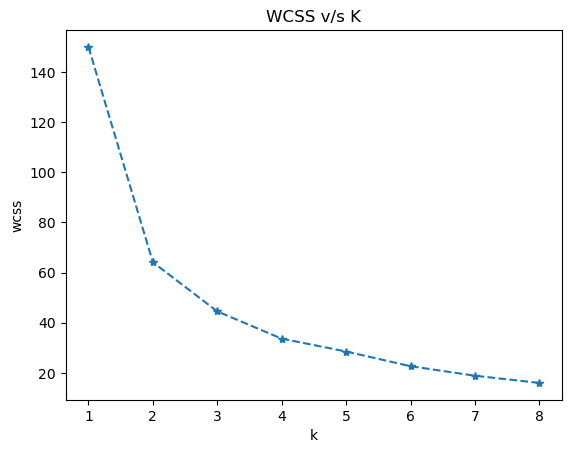

In [16]:
#plotting a graph for wcss v/s clusters
plt.figure()
plt.plot(cluster,wcss,"*--")
plt.title("WCSS v/s K")
plt.xlabel("k")
plt.ylabel("wcss")
plt.show()

In [17]:
#from the above graph we can observe a huge drop
# from 1-2, but there is a also a drop b/w 2-3
#But after 3 the drop in wcss is very less
#so we can consider 3 clusters for final model

In [18]:
#final model
final_model=KMeans(n_clusters=3)
final_model.fit(df_new)

KMeans(n_clusters=3)

In [19]:
final_model.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [21]:
df["Labels"]=final_model.labels_
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradeRate,Labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,GeorgeTown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JhonsHopkins,1305,75,44,7,58691,87,2


In [22]:
#Finding the colleges in each label
df[df['Labels']==0]['Univ']#midlevel colleges

0            Brown
2              CMU
3         Columbia
4          Cornell
7       GeorgeTown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
Name: Univ, dtype: object

In [23]:
df[df['Labels']==1]['Univ'] #poor colleges

13     PennState
15       Purdue 
17      TexasA&M
23    UWisconsin
Name: Univ, dtype: object

In [24]:
df[df['Labels']==2]['Univ'] #Good colleges

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JhonsHopkins
10             MIT
14        Priceton
16        Stanford
24            Yale
Name: Univ, dtype: object

# Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA

In [26]:
#PCA model
pc=PCA(n_components=3,random_state=1)
components=pc.fit_transform(df_new)

In [27]:
components.ndim

2

In [28]:
pc1=components[:,0]
pc2=components[:,1]
pc3=components[:,2]

In [29]:
pc2

array([-1.06430962,  2.25904458,  1.63120889, -0.04218747, -0.63524357,
       -0.34436328, -0.49098366, -0.78516859, -0.38653888,  2.11951503,
        0.08823712, -0.01113295, -1.00920438, -0.37458049, -0.37179329,
        0.77991535, -0.30559745, -0.34759136, -0.69890615,  0.65044645,
       -0.22476756, -0.07958884, -1.0171672 ,  0.77846167, -0.11770432])

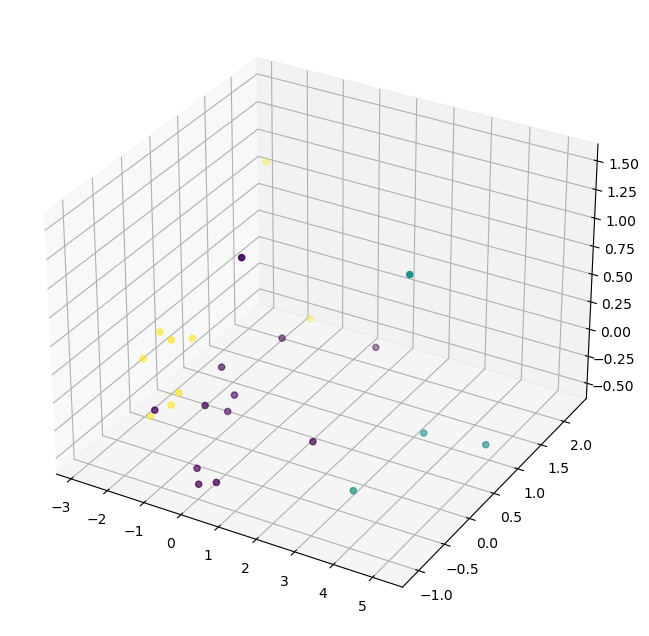

In [30]:
#3D plot
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.scatter(pc1,pc2,pc3,c=df['Labels'])
plt.show()

In [31]:
#Aggregation using Numpy
import numpy as np

n=np.array([10,20,30,40,50,60,70,80,90,100])
total=print("Sum of values:",np.sum(n))          #sum
minimum=print("Min value:",np.min(n))            #Agg minimum value
maximum=print("Max value:",np.max(n))            #Agg maximum value
count=print("Number of values:",np.mean(n))      #Agg mean

Sum of values: 550
Min value: 10
Max value: 100
Number of values: 55.0


In [32]:
np.shape(n)

(10,)